I  certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I  did not receive any external help, coaching or contributions during the production of this work.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import numpy as np 
from keras.layers import BatchNormalization

In [ ]:
df = pd.read_csv('./income_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours.per.week  32561 non-null  int64  
 11  native.country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df[df['workclass']=='?'].count()

age               1836
workclass         1836
fnlwgt            1835
education         1836
education.num     1836
marital.status    1836
occupation        1836
relationship      1836
capital.gain      1836
capital.loss      1836
hours.per.week    1836
native.country    1836
income            1836
dtype: int64

In [ ]:
df = df[df['workclass']!='?']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30725 non-null  int64  
 1   workclass       30725 non-null  object 
 2   fnlwgt          30725 non-null  float64
 3   education       30725 non-null  object 
 4   education.num   30725 non-null  int64  
 5   marital.status  30725 non-null  object 
 6   occupation      30725 non-null  object 
 7   relationship    30725 non-null  object 
 8   capital.gain    30725 non-null  int64  
 9   capital.loss    30725 non-null  int64  
 10  hours.per.week  30725 non-null  int64  
 11  native.country  30725 non-null  object 
 12  income          30725 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.3+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K


In [ ]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [ ]:
df[df['native.country']=='?'].count()

age               556
workclass         556
fnlwgt            556
education         556
education.num     556
marital.status    556
occupation        556
relationship      556
capital.gain      556
capital.loss      556
hours.per.week    556
native.country    556
income            556
dtype: int64

In [ ]:
df = df[df['native.country']!='?']

In [ ]:
df[df['occupation']=='?'].count()

age               7
workclass         7
fnlwgt            7
education         7
education.num     7
marital.status    7
occupation        7
relationship      7
capital.gain      7
capital.loss      7
hours.per.week    7
native.country    7
income            7
dtype: int64

In [ ]:
df = df[df['occupation']!='?']

In [ ]:
df[df['hours.per.week']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  int64  
 1   workclass       30162 non-null  object 
 2   fnlwgt          30162 non-null  float64
 3   education       30162 non-null  object 
 4   education.num   30162 non-null  int64  
 5   marital.status  30162 non-null  object 
 6   occupation      30162 non-null  object 
 7   relationship    30162 non-null  object 
 8   capital.gain    30162 non-null  int64  
 9   capital.loss    30162 non-null  int64  
 10  hours.per.week  30162 non-null  int64  
 11  native.country  30162 non-null  object 
 12  income          30162 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K


In [ ]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [ ]:
df['workclass'] = df['workclass'].astype('category')

In [ ]:
df['education'] = df['education'].astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['native.country'] = df['native.country'].astype('category')
df['income'] = df['income'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  float64 
 3   education       30162 non-null  category
 4   education.num   30162 non-null  int64   
 5   marital.status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   capital.gain    30162 non-null  int64   
 9   capital.loss    30162 non-null  int64   
 10  hours.per.week  30162 non-null  int64   
 11  native.country  30162 non-null  category
 12  income          30162 non-null  category
dtypes: category(7), float64(1), int64(5)
memory usage: 1.8 MB


In [ ]:
df['workclass'] = df['workclass'].cat.codes

In [ ]:
df['education'] = df['education'].cat.codes
df['marital.status'] = df['marital.status'].cat.codes
df['occupation'] = df['occupation'].cat.codes
df['relationship'] = df['relationship'].cat.codes
df['native.country'] = df['native.country'].cat.codes
df['income'] = df['income'].cat.codes

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,186061.0,11,9,6,3,1,0,4356,18,38,0
3,54,2,140359.0,5,4,0,6,4,0,3900,40,38,0
4,41,2,264663.0,15,10,5,9,3,0,3900,40,38,0
5,34,2,216864.0,11,9,0,7,4,0,3770,45,38,0
6,38,2,150601.0,0,6,5,0,4,0,3770,40,38,0


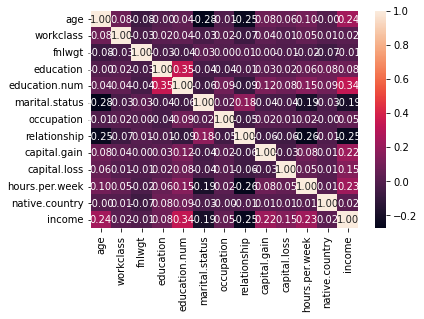

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

Text(0.5, 1.0, 'Income ->0: >=50k , 1: <50k')

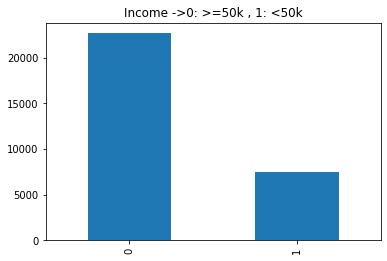

In [ ]:
df['income'].value_counts().plot(kind='bar')
plt.title( 'Income ->0: >=50k , 1: <50k')

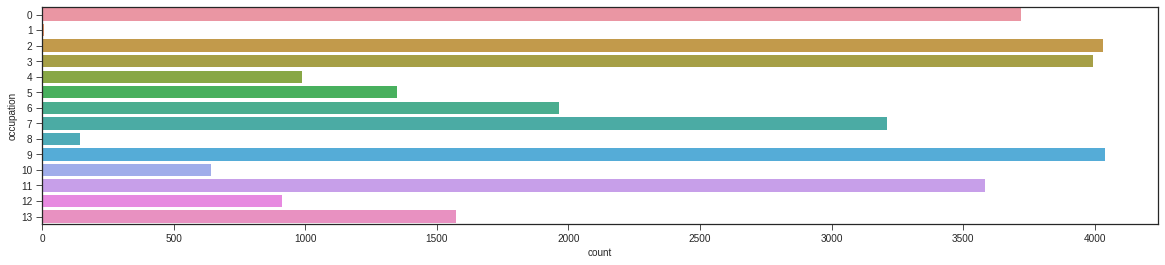

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)

In [ ]:
df['income'].unique()

array([0, 1], dtype=int8)

In [ ]:
X = df.iloc[:,0:13]

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,186061.0,11,9,6,3,1,0,4356,18,38,0
3,54,2,140359.0,5,4,0,6,4,0,3900,40,38,0
4,41,2,264663.0,15,10,5,9,3,0,3900,40,38,0
5,34,2,216864.0,11,9,0,7,4,0,3770,45,38,0
6,38,2,150601.0,0,6,5,0,4,0,3770,40,38,0


In [ ]:
X.drop(columns=['income'],inplace=True)

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,186061.0,11,9,6,3,1,0,4356,18,38
3,54,2,140359.0,5,4,0,6,4,0,3900,40,38
4,41,2,264663.0,15,10,5,9,3,0,3900,40,38
5,34,2,216864.0,11,9,0,7,4,0,3770,45,38
6,38,2,150601.0,0,6,5,0,4,0,3770,40,38


In [ ]:
y = df.iloc[:,12:13]

In [ ]:
y.head()

,income
1,0
3,0
4,0
5,0
6,0


In [ ]:
sc = StandardScaler()
X_features = sc.fit_transform(X)

In [ ]:
X_features

array([[ 3.31662977, -0.20895464, -0.03534853, ..., 10.55581365,
        -1.91416096,  0.26492394],
       [ 1.18483085, -0.20895464, -0.46792488, ...,  9.42791507,
        -0.07773411,  0.26492394],
       [ 0.19506706, -0.20895464,  0.7086313 , ...,  9.42791507,
        -0.07773411,  0.26492394],
       ...,
       [ 0.11893139, -0.20895464, -0.33527078, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 1.48937355, -0.20895464, -0.35859291, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.11068929, ..., -0.21858598,
        -1.74721307,  0.26492394]])

In [ ]:
X_features.shape

(30162, 12)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y,test_size=0.25,random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(20,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________


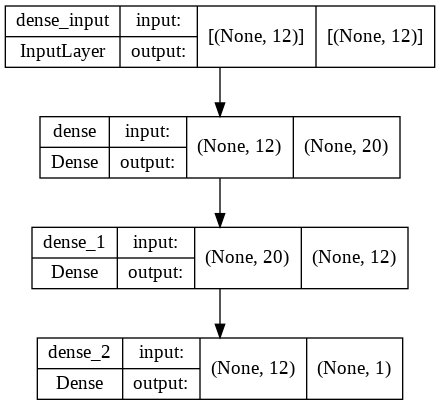

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
train = model.fit(X_train,y_train,batch_size=500,epochs=80,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/80
46/46 [==============================] - 1s 7ms/step - loss: 0.6541 - accuracy: 0.6407 - val_loss: 0.5747 - val_accuracy: 0.7423
Epoch 2/80
46/46 [==============================] - 0s 4ms/step - loss: 0.5250 - accuracy: 0.7522 - val_loss: 0.4899 - val_accuracy: 0.7589
Epoch 3/80
46/46 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7867 - val_loss: 0.4356 - val_accuracy: 0.8036
Epoch 4/80
46/46 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8158 - val_loss: 0.4062 - val_accuracy: 0.8197
Epoch 5/80
46/46 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8240 - val_loss: 0.3908 - val_accuracy: 0.8260
Epoch 6/80
46/46 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8280 - val_loss: 0.3817 - val_accuracy: 0.8291
Epoch 7/80
46/46 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8317 - val_loss: 0.3748 - val_accuracy: 0.8277
Epoch 8/80
46/46 [==

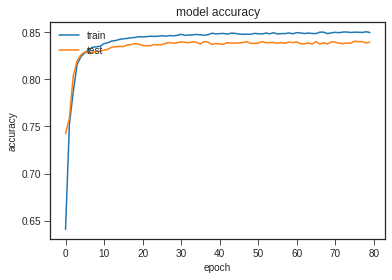

In [ ]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss,accuracy = model.evaluate(X_train,y_train)
print('The accuracy of the model :', accuracy)
print('The Loss is :',loss)

707/707 [==============================] - 1s 2ms/step - loss: 0.3170 - accuracy: 0.8510
The accuracy of the model : 0.8509791493415833
The Loss is : 0.3170298933982849


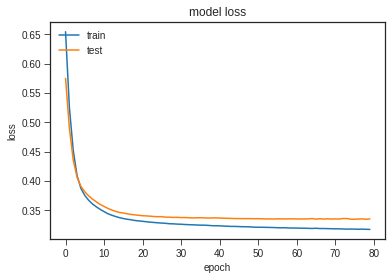

In [ ]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Changing Optimizer

Epoch 1/40
46/46 [==============================] - 1s 6ms/step - loss: 0.7421 - accuracy: 0.4418 - val_loss: 0.6982 - val_accuracy: 0.5474
Epoch 2/40
46/46 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6138 - val_loss: 0.6468 - val_accuracy: 0.6699
Epoch 3/40
46/46 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.7062 - val_loss: 0.6133 - val_accuracy: 0.7299
Epoch 4/40
46/46 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7439 - val_loss: 0.5889 - val_accuracy: 0.7479
Epoch 5/40
46/46 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.7533 - val_loss: 0.5697 - val_accuracy: 0.7514
Epoch 6/40
46/46 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7556 - val_loss: 0.5535 - val_accuracy: 0.7527
Epoch 7/40
46/46 [==============================] - 0s 4ms/step - loss: 0.5436 - accuracy: 0.7566 - val_loss: 0.5393 - val_accuracy: 0.7539
Epoch 8/40
46/46 [==

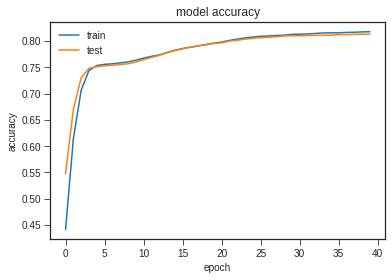

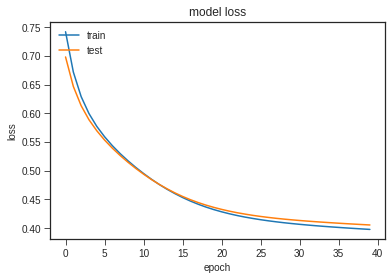

Epoch 1/40
46/46 [==============================] - 1s 6ms/step - loss: 0.7501 - accuracy: 0.4418 - val_loss: 0.7490 - val_accuracy: 0.4446
Epoch 2/40
46/46 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.4430 - val_loss: 0.7485 - val_accuracy: 0.4454
Epoch 3/40
46/46 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.4434 - val_loss: 0.7480 - val_accuracy: 0.4466
Epoch 4/40
46/46 [==============================] - 0s 4ms/step - loss: 0.7485 - accuracy: 0.4443 - val_loss: 0.7475 - val_accuracy: 0.4476
Epoch 5/40
46/46 [==============================] - 0s 4ms/step - loss: 0.7480 - accuracy: 0.4450 - val_loss: 0.7469 - val_accuracy: 0.4491
Epoch 6/40
46/46 [==============================] - 0s 4ms/step - loss: 0.7474 - accuracy: 0.4456 - val_loss: 0.7463 - val_accuracy: 0.4495
Epoch 7/40
46/46 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.4463 - val_loss: 0.7457 - val_accuracy: 0.4509
Epoch 8/40
46/46 [==

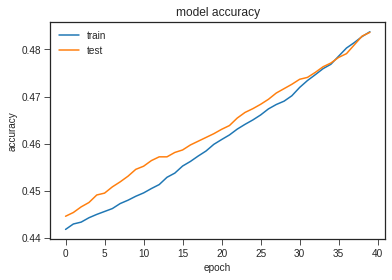

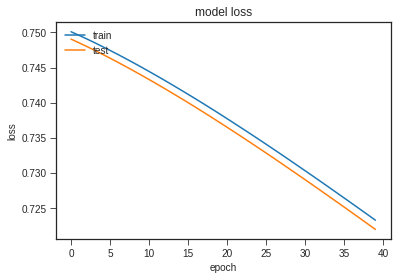

Epoch 1/40
46/46 [==============================] - 1s 6ms/step - loss: 0.5534 - accuracy: 0.7311 - val_loss: 0.4969 - val_accuracy: 0.7659
Epoch 2/40
46/46 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.7841 - val_loss: 0.4385 - val_accuracy: 0.7922
Epoch 3/40
46/46 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8066 - val_loss: 0.4022 - val_accuracy: 0.8136
Epoch 4/40
46/46 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8224 - val_loss: 0.3795 - val_accuracy: 0.8260
Epoch 5/40
46/46 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8297 - val_loss: 0.3641 - val_accuracy: 0.8297
Epoch 6/40
46/46 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8359 - val_loss: 0.3539 - val_accuracy: 0.8319
Epoch 7/40
46/46 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8405 - val_loss: 0.3482 - val_accuracy: 0.8349
Epoch 8/40
46/46 [==

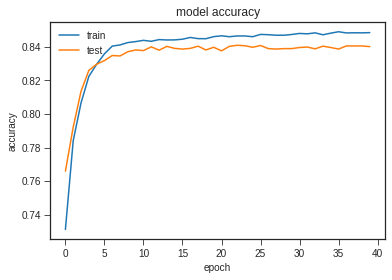

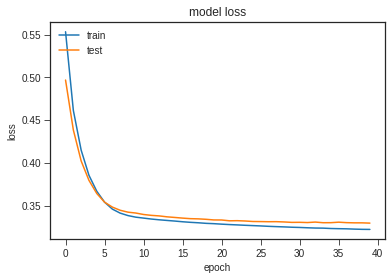

In [ ]:
op = ['SGD','Adadelta','RMSprop']
train_op_acc = []
test_op_acc = []
for i in op:

  model = Sequential()
  model.add(Dense(20,input_dim=12,activation='tanh'))
  model.add(Dense(12,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer=i,loss='binary_crossentropy',metrics=['accuracy'])
  train = model.fit(X_train,y_train,batch_size=500,epochs=40,validation_data=(X_test,y_test),shuffle=True)
  #model.summary()
  loss,accuracy = model.evaluate(X_train,y_train)
  train_op_acc.append(accuracy)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()




Changing Dropout

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.8086 - accuracy: 0.3834 - val_loss: 0.6830 - val_accuracy: 0.5640
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6332 - val_loss: 0.5719 - val_accuracy: 0.7544
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7439 - val_loss: 0.4997 - val_accuracy: 0.7933
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7890 - val_loss: 0.4547 - val_accuracy: 0.8075
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8050 - val_loss: 0.4303 - val_accuracy: 0.8108
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.8118 - val_loss: 0.4168 - val_accuracy: 0.8137
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8170 - val_loss: 0.4079 - val_accuracy: 0.8153
Epoch 8/20
46/46 [==

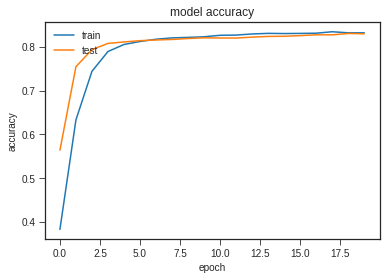

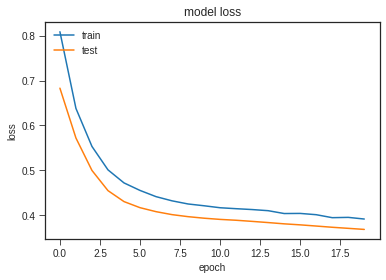

Epoch 1/20
46/46 [==============================] - 1s 6ms/step - loss: 0.6716 - accuracy: 0.5961 - val_loss: 0.5564 - val_accuracy: 0.7227
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7112 - val_loss: 0.4840 - val_accuracy: 0.7601
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7498 - val_loss: 0.4494 - val_accuracy: 0.7832
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.7723 - val_loss: 0.4266 - val_accuracy: 0.8010
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4443 - accuracy: 0.7849 - val_loss: 0.4089 - val_accuracy: 0.8120
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7978 - val_loss: 0.3955 - val_accuracy: 0.8195
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8059 - val_loss: 0.3859 - val_accuracy: 0.8234
Epoch 8/20
46/46 [==

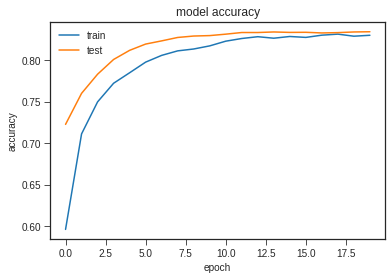

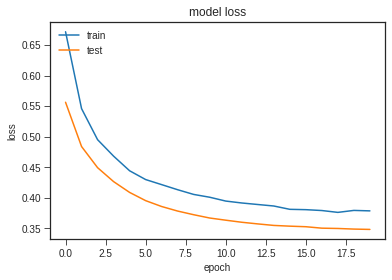

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.7237 - accuracy: 0.6121 - val_loss: 0.5970 - val_accuracy: 0.7248
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.7244 - val_loss: 0.5376 - val_accuracy: 0.7591
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7596 - val_loss: 0.4900 - val_accuracy: 0.7784
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7714 - val_loss: 0.4554 - val_accuracy: 0.7974
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7796 - val_loss: 0.4330 - val_accuracy: 0.8092
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7833 - val_loss: 0.4185 - val_accuracy: 0.8171
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7900 - val_loss: 0.4081 - val_accuracy: 0.8197
Epoch 8/20
46/46 [==

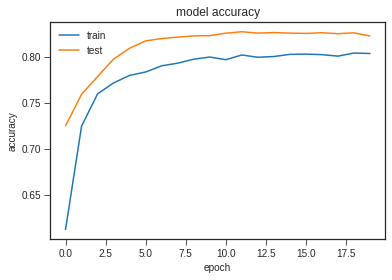

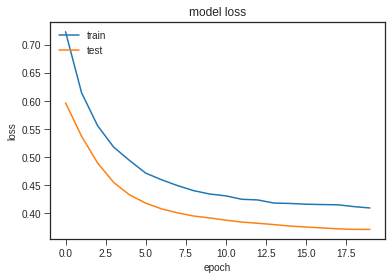

In [ ]:
dr = [0.3,0.5,0.7]
train_dr_acc = []
test_dr_acc = []
for i in dr:

  model = Sequential()
  model.add(Dense(20,input_dim=12,activation='tanh'))
  model.add(Dense(12,activation='relu'))
  model.add(Dropout(i))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  train = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data=(X_test,y_test),shuffle=True)
  #model.summary()
  loss,accuracy = model.evaluate(X_train,y_train)
  train_op_acc.append(accuracy)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()




Changing Activation functions

Epoch 1/20
46/46 [==============================] - 1s 6ms/step - loss: 0.6427 - accuracy: 0.6218 - val_loss: 0.5372 - val_accuracy: 0.7226
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7741 - val_loss: 0.4413 - val_accuracy: 0.8089
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8136 - val_loss: 0.4045 - val_accuracy: 0.8185
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.8213 - val_loss: 0.3932 - val_accuracy: 0.8235
Epoch 5/20
46/46 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.8261 - val_loss: 0.3854 - val_accuracy: 0.8250
Epoch 6/20
46/46 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8292 - val_loss: 0.3773 - val_accuracy: 0.8287
Epoch 7/20
46/46 [==============================] - 0s 6ms/step - loss: 0.3666 - accuracy: 0.8333 - val_loss: 0.3685 - val_accuracy: 0.8292
Epoch 8/20
46/46 [==

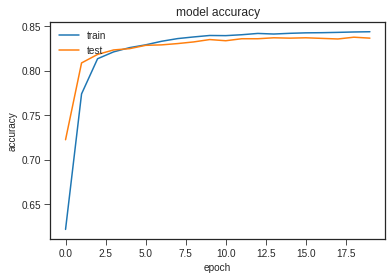

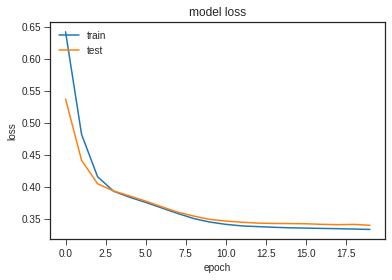

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.6025 - accuracy: 0.6636 - val_loss: 0.4958 - val_accuracy: 0.7760
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7984 - val_loss: 0.4223 - val_accuracy: 0.8167
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8170 - val_loss: 0.4014 - val_accuracy: 0.8208
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8203 - val_loss: 0.3910 - val_accuracy: 0.8234
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8237 - val_loss: 0.3821 - val_accuracy: 0.8268
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8271 - val_loss: 0.3741 - val_accuracy: 0.8293
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8295 - val_loss: 0.3668 - val_accuracy: 0.8308
Epoch 8/20
46/46 [==

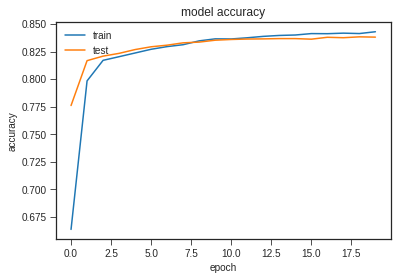

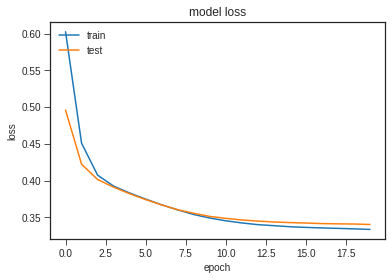

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.6170 - accuracy: 0.6596 - val_loss: 0.5277 - val_accuracy: 0.7734
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8018 - val_loss: 0.4360 - val_accuracy: 0.8081
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8172 - val_loss: 0.4052 - val_accuracy: 0.8174
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8213 - val_loss: 0.3976 - val_accuracy: 0.8193
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8239 - val_loss: 0.3936 - val_accuracy: 0.8198
Epoch 6/20
46/46 [==============================] - 0s 5ms/step - loss: 0.3871 - accuracy: 0.8247 - val_loss: 0.3900 - val_accuracy: 0.8208
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8268 - val_loss: 0.3855 - val_accuracy: 0.8222
Epoch 8/20
46/46 [==

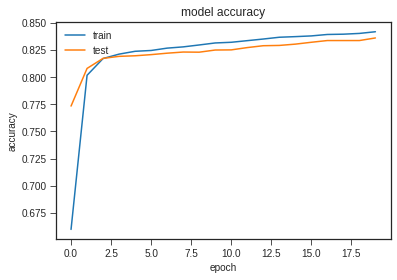

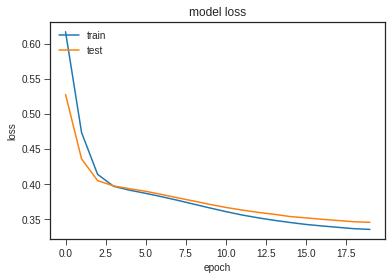

In [ ]:
fn = ['selu','elu','tanh']
train_fn_acc = []
test_fn_acc = []
for i in fn:

  model = Sequential()
  model.add(Dense(20,input_dim=12,activation=i))
  model.add(Dense(12,activation=i))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  train = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data=(X_test,y_test),shuffle=True)
  #model.summary()
  loss,accuracy = model.evaluate(X_train,y_train)
  train_fn_acc.append(accuracy)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()




Early Stopping

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.5750 - accuracy: 0.7436 - val_loss: 0.5166 - val_accuracy: 0.7540
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7754 - val_loss: 0.4491 - val_accuracy: 0.7915
Epoch 2: early stopping
236/236 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7915


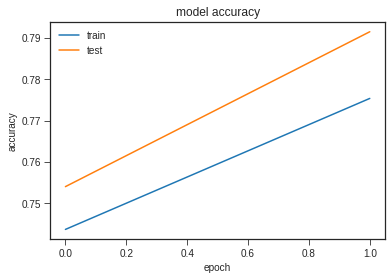

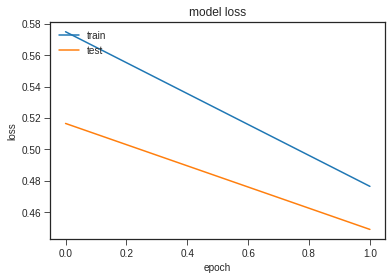

In [ ]:
model = Sequential()
model.add(Dense(20,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
train = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data=(X_test,y_test),shuffle=True,callbacks=[es])
train_loss,train_accuracy = model.evaluate(X_train,y_train)
val_loss,val_accuracy = model.evaluate(X_test,y_test)
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#model.summary()

KFold

In [ ]:
X_new = np.concatenate((X_train,X_test),axis=0)

In [ ]:
X_new.shape

(30162, 12)

In [ ]:
y_new = np.concatenate((y_train,y_test),axis=0)

In [ ]:
y_new.shape

(30162, 1)

In [ ]:
kf = KFold(n_splits=2,shuffle=True,random_state=5)

Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.4857 - accuracy: 0.7781 - val_loss: 0.4460 - val_accuracy: 0.7899
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8056 - val_loss: 0.4106 - val_accuracy: 0.8094
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8174 - val_loss: 0.3911 - val_accuracy: 0.8190
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8261 - val_loss: 0.3767 - val_accuracy: 0.8244
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8317 - val_loss: 0.3651 - val_accuracy: 0.8285
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8350 - val_loss: 0.3573 - val_accuracy: 0.8301
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.8367 - val_loss: 0.3517 - val_accuracy: 0.8334
Epoch 8/20
46/46 [==

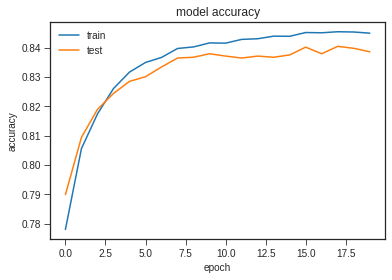

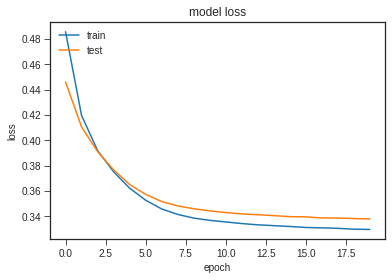

Epoch 1/20
46/46 [==============================] - 1s 6ms/step - loss: 0.6166 - accuracy: 0.7020 - val_loss: 0.5471 - val_accuracy: 0.7659
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7780 - val_loss: 0.4657 - val_accuracy: 0.7909
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8085 - val_loss: 0.4220 - val_accuracy: 0.8101
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8220 - val_loss: 0.3955 - val_accuracy: 0.8207
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8273 - val_loss: 0.3797 - val_accuracy: 0.8236
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8319 - val_loss: 0.3693 - val_accuracy: 0.8263
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8348 - val_loss: 0.3621 - val_accuracy: 0.8292
Epoch 8/20
46/46 [==

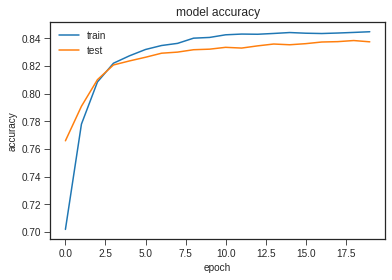

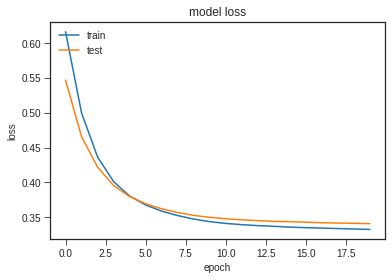

In [ ]:
for train,test in kf.split(X_new,y_new):
  model = Sequential()
  model.add(Dense(20,input_dim=12,activation='relu'))
  model.add(Dense(12,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  train = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


Batch Normalization

Epoch 1/20
46/46 [==============================] - 2s 12ms/step - loss: 0.8656 - accuracy: 0.4127 - val_loss: 0.6915 - val_accuracy: 0.5357
Epoch 2/20
46/46 [==============================] - 0s 6ms/step - loss: 0.6071 - accuracy: 0.6687 - val_loss: 0.5691 - val_accuracy: 0.7553
Epoch 2: early stopping
236/236 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7553


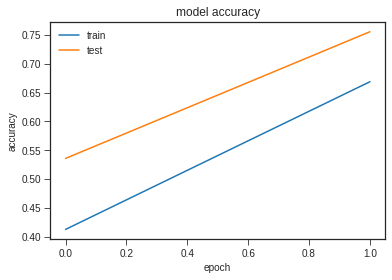

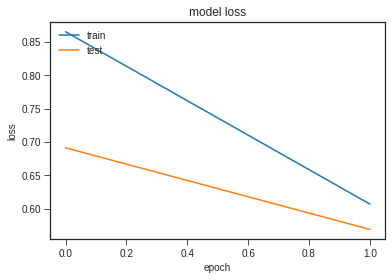

In [ ]:
model = Sequential()
model.add(Dense(20,input_dim=12,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
train = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data=(X_test,y_test),shuffle=True,callbacks=[es])
train_loss,train_accuracy = model.evaluate(X_train,y_train)
val_loss,val_accuracy = model.evaluate(X_test,y_test)
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#model.summary()